In [174]:
import pandas as pd
import numpy as np

In [175]:
df=pd.read_csv('WIPRO.NS (2).csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-16,209.437546,215.250046,209.137558,212.325058,207.814636,6271895
1,2018-07-17,212.250046,216.712555,211.312546,212.925049,208.401901,7235784
2,2018-07-18,214.500046,215.475052,212.737549,213.600052,209.062561,3062957
3,2018-07-19,214.500046,216.262558,211.200058,214.350052,209.796646,3717195
4,2018-07-20,215.625046,217.950058,210.375046,212.250046,207.741226,6983196


In [176]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1229,2023-07-10,395.850006,395.850006,389.649994,389.950012,389.950012,2815200
1230,2023-07-11,390.000000,392.799988,387.850006,392.049988,392.049988,4817419
1231,2023-07-12,393.899994,393.950012,390.350006,391.850006,391.850006,3424110
1232,2023-07-13,391.850006,398.600006,391.250000,394.299988,394.299988,6797863
1233,2023-07-14,394.750000,405.500000,392.350006,405.049988,405.049988,15683392


In [177]:

print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [178]:
df['symbol']='wpr'

In [179]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,symbol
0,2018-07-16,209.437546,215.250046,209.137558,212.325058,207.814636,6271895,wpr
1,2018-07-17,212.250046,216.712555,211.312546,212.925049,208.401901,7235784,wpr
2,2018-07-18,214.500046,215.475052,212.737549,213.600052,209.062561,3062957,wpr
3,2018-07-19,214.500046,216.262558,211.200058,214.350052,209.796646,3717195,wpr
4,2018-07-20,215.625046,217.950058,210.375046,212.250046,207.741226,6983196,wpr


In [180]:
df1=df.reset_index()['Close']

In [181]:
df1

0       212.325058
1       212.925049
2       213.600052
3       214.350052
4       212.250046
           ...    
1229    389.950012
1230    392.049988
1231    391.850006
1232    394.299988
1233    405.049988
Name: Close, Length: 1234, dtype: float64

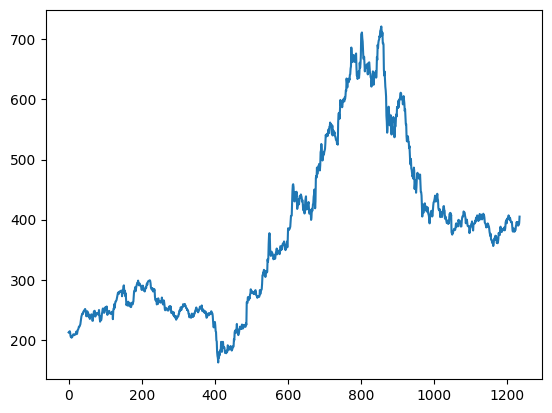

In [182]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [183]:
df1

0       212.325058
1       212.925049
2       213.600052
3       214.350052
4       212.250046
           ...    
1229    389.950012
1230    392.049988
1231    391.850006
1232    394.299988
1233    405.049988
Name: Close, Length: 1234, dtype: float64

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [185]:
print(df1)

[[0.08937683]
 [0.09044987]
 [0.09165706]
 ...
 [0.41044443]
 [0.41482605]
 [0.43405166]]


In [186]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [187]:
training_size,test_size


(802, 432)

In [188]:
train_data[0:10]

array([[0.08937683],
       [0.09044987],
       [0.09165706],
       [0.09299838],
       [0.08924267],
       [0.08045703],
       [0.07576241],
       [0.07810972],
       [0.07368335],
       [0.07784144]])

In [189]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [190]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [191]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [192]:
print(X_test.shape), print(ytest.shape)

(331, 100)
(331,)


(None, None)

In [193]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [194]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [195]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [196]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [197]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 11s 280ms/step - loss: 0.0388 - val_loss: 0.0049
Epoch 2/100
11/11 [==============================] - 1s 138ms/step - loss: 0.0067 - val_loss: 0.0131
Epoch 3/100
11/11 [==============================] - 2s 150ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 4/100
11/11 [==============================] - 2s 160ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 5/100
11/11 [==============================] - 2s 157ms/step - loss: 0.0013 - val_loss: 0.0035
Epoch 6/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0011 - val_loss: 0.0032
Epoch 7/100
11/11 [==============================] - 1s 128ms/step - loss: 0.0010 - val_loss: 0.0026
Epoch 8/100
11/11 [==============================] - 1s 136ms/step - loss: 0.0010 - val_loss: 0.0022
Epoch 9/100
11/11 [==============================] - 2s 147ms/step - loss: 0.0010 - val_loss: 0.0020
Epoch 10/100
11/11 [==============================] - 2s 154ms/step - loss: 0.0010 - val_l

Epoch 78/100
11/11 [==============================] - 2s 164ms/step - loss: 4.9340e-04 - val_loss: 6.8642e-04
Epoch 79/100
11/11 [==============================] - 2s 168ms/step - loss: 4.8121e-04 - val_loss: 9.5470e-04
Epoch 80/100
11/11 [==============================] - 2s 168ms/step - loss: 5.1039e-04 - val_loss: 8.2141e-04
Epoch 81/100
11/11 [==============================] - 2s 163ms/step - loss: 5.3577e-04 - val_loss: 7.4926e-04
Epoch 82/100
11/11 [==============================] - 2s 168ms/step - loss: 5.3462e-04 - val_loss: 8.5194e-04
Epoch 83/100
11/11 [==============================] - 2s 170ms/step - loss: 4.6920e-04 - val_loss: 7.6366e-04
Epoch 84/100
11/11 [==============================] - 2s 168ms/step - loss: 4.8030e-04 - val_loss: 6.1974e-04
Epoch 85/100
11/11 [==============================] - 2s 178ms/step - loss: 4.7955e-04 - val_loss: 7.6714e-04
Epoch 86/100
11/11 [==============================] - 2s 173ms/step - loss: 4.8469e-04 - val_loss: 5.9498e-04
Epoch 87/1

In [198]:
len(df1)

1234

In [199]:
import tensorflow as tf

In [200]:
tf.__version__

'2.10.0'

In [201]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 38ms/step


In [202]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02257291277633179

In [203]:
math.sqrt(mean_squared_error(ytest,test_predict))


0.03516266476617573

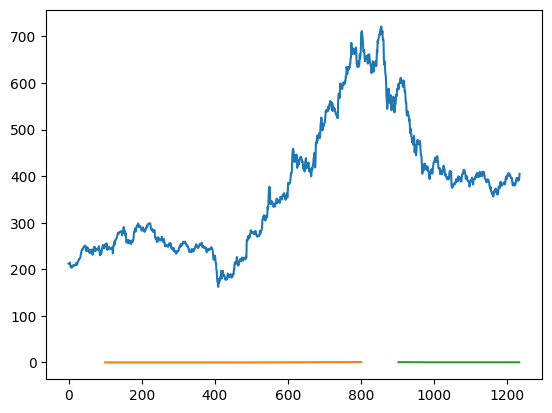

In [204]:
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [205]:
len(test_data)

432

In [206]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 91)

In [207]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [208]:
from numpy import array

lst_output=[]
n_steps=91
i=0
while(i<30):
    
    if(len(temp_input)>91):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.43917888]
92
1 day input [0.40364837 0.40794064 0.41384243 0.41178575 0.40731468 0.40552625
 0.39899849 0.38826792 0.38165071 0.37646428 0.38299203 0.36627021
 0.36492889 0.36492889 0.3561656  0.35661271 0.35571849 0.34668695
 0.35178393 0.36287221 0.36770099 0.37092014 0.365376   0.37726904
 0.37181435 0.37521236 0.3683269  0.35589735 0.36761154 0.35491368
 0.35857999 0.36787979 0.38558528 0.38147186 0.37950458 0.37923632
 0.39819368 0.40418493 0.39837253 0.39586874 0.38817847 0.3898775
 0.3933649  0.39595814 0.39756772 0.39506393 0.399535   0.40168114
 0.3933649  0.39390146 0.40033982 0.41741929 0.4208173  0.42448361
 0.41446839 0.42806046 0.42466241 0.42949119 0.43154787 0.43780737
 0.43387286 0.43253154 0.42493071 0.43002769 0.4242153  0.42019133
 0.41715104 0.41706158 0.41867121 0.405258   0.39157647 0.38951979
 0.39372261 0.39908789 0.3933649  0.38916214 0.39086111 0.39390146
 0.39390146 0.40561565 0.40999732 0.417777   0.41411069 0.41822411
 0.41759814 0.40704642 0.41080208 0

8 day output [[0.4767493]]
9 day input [0.38165071 0.37646428 0.38299203 0.36627021 0.36492889 0.36492889
 0.3561656  0.35661271 0.35571849 0.34668695 0.35178393 0.36287221
 0.36770099 0.37092014 0.365376   0.37726904 0.37181435 0.37521236
 0.3683269  0.35589735 0.36761154 0.35491368 0.35857999 0.36787979
 0.38558528 0.38147186 0.37950458 0.37923632 0.39819368 0.40418493
 0.39837253 0.39586874 0.38817847 0.3898775  0.3933649  0.39595814
 0.39756772 0.39506393 0.399535   0.40168114 0.3933649  0.39390146
 0.40033982 0.41741929 0.4208173  0.42448361 0.41446839 0.42806046
 0.42466241 0.42949119 0.43154787 0.43780737 0.43387286 0.43253154
 0.42493071 0.43002769 0.4242153  0.42019133 0.41715104 0.41706158
 0.41867121 0.405258   0.39157647 0.38951979 0.39372261 0.39908789
 0.3933649  0.38916214 0.39086111 0.39390146 0.39390146 0.40561565
 0.40999732 0.417777   0.41411069 0.41822411 0.41759814 0.40704642
 0.41080208 0.41044443 0.41482605 0.43405166 0.43917888 0.44086757
 0.44410527 0.44850627 

16 day output [[0.5232891]]
17 day input [0.35571849 0.34668695 0.35178393 0.36287221 0.36770099 0.37092014
 0.365376   0.37726904 0.37181435 0.37521236 0.3683269  0.35589735
 0.36761154 0.35491368 0.35857999 0.36787979 0.38558528 0.38147186
 0.37950458 0.37923632 0.39819368 0.40418493 0.39837253 0.39586874
 0.38817847 0.3898775  0.3933649  0.39595814 0.39756772 0.39506393
 0.399535   0.40168114 0.3933649  0.39390146 0.40033982 0.41741929
 0.4208173  0.42448361 0.41446839 0.42806046 0.42466241 0.42949119
 0.43154787 0.43780737 0.43387286 0.43253154 0.42493071 0.43002769
 0.4242153  0.42019133 0.41715104 0.41706158 0.41867121 0.405258
 0.39157647 0.38951979 0.39372261 0.39908789 0.3933649  0.38916214
 0.39086111 0.39390146 0.39390146 0.40561565 0.40999732 0.417777
 0.41411069 0.41822411 0.41759814 0.40704642 0.41080208 0.41044443
 0.41482605 0.43405166 0.43917888 0.44086757 0.44410527 0.44850627
 0.45365775 0.45923176 0.46501076 0.47087035 0.4767493  0.48262298
 0.48848364 0.49432915 0.

24 day output [[0.5692701]]
25 day input [0.37181435 0.37521236 0.3683269  0.35589735 0.36761154 0.35491368
 0.35857999 0.36787979 0.38558528 0.38147186 0.37950458 0.37923632
 0.39819368 0.40418493 0.39837253 0.39586874 0.38817847 0.3898775
 0.3933649  0.39595814 0.39756772 0.39506393 0.399535   0.40168114
 0.3933649  0.39390146 0.40033982 0.41741929 0.4208173  0.42448361
 0.41446839 0.42806046 0.42466241 0.42949119 0.43154787 0.43780737
 0.43387286 0.43253154 0.42493071 0.43002769 0.4242153  0.42019133
 0.41715104 0.41706158 0.41867121 0.405258   0.39157647 0.38951979
 0.39372261 0.39908789 0.3933649  0.38916214 0.39086111 0.39390146
 0.39390146 0.40561565 0.40999732 0.417777   0.41411069 0.41822411
 0.41759814 0.40704642 0.41080208 0.41044443 0.41482605 0.43405166
 0.43917888 0.44086757 0.44410527 0.44850627 0.45365775 0.45923176
 0.46501076 0.47087035 0.4767493  0.48262298 0.48848364 0.49432915
 0.50015861 0.50597054 0.51176322 0.51753581 0.52328908 0.52902538
 0.53474951 0.54046762

In [209]:
day_new=np.arange(1,101)
day_pred=np.arange(101
                   ,131)

In [210]:
import matplotlib.pyplot as plt

In [211]:
len(df1)

1234

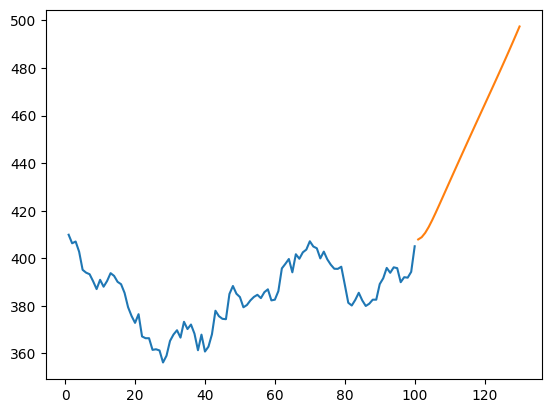

In [212]:
plt.plot(day_new,scaler.inverse_transform(df1[1134:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

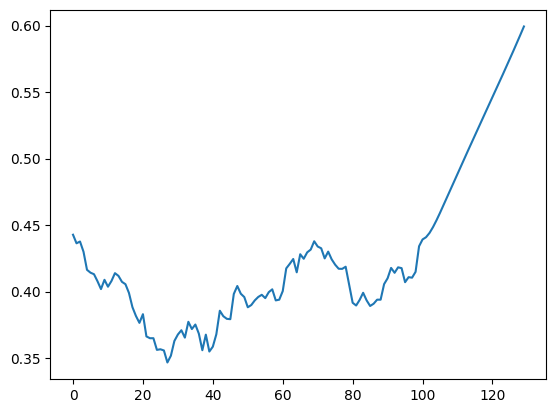

In [213]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1134:])

In [214]:
df3=scaler.inverse_transform(df3).tolist()

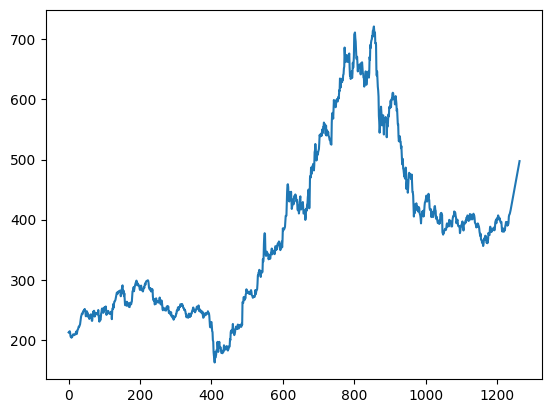

In [215]:
plt.plot(df3)